<a href="https://colab.research.google.com/github/haleema-4/mlpro/blob/main/CODINGRAJAPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob
import numpy as np


In [ ]:
IMG_SIZE=[225,225]
training_path='/content/drive/MyDrive/training'
validation_path='/content/drive/MyDrive/evaluation'

In [ ]:
inception=InceptionV3(input_shape=IMG_SIZE+[3],weights='imagenet',include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable=False
folder=glob('/content/drive/MyDrive/training/*')
folder

['/content/drive/MyDrive/training/Noodles-Pasta',
 '/content/drive/MyDrive/training/Soup',
 '/content/drive/MyDrive/training/Rice',
 '/content/drive/MyDrive/training/Seafood',
 '/content/drive/MyDrive/training/Fried food',
 '/content/drive/MyDrive/training/Egg',
 '/content/drive/MyDrive/training/Dessert',
 '/content/drive/MyDrive/training/Dairy product',
 '/content/drive/MyDrive/training/Meat',
 '/content/drive/MyDrive/training/Vegetable-Fruit',
 '/content/drive/MyDrive/training/Bread']

In [ ]:
x=Flatten()(inception.output)
prediction=Dense(len(folder),activation='softmax')(x)
model=Model(inputs=inception.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 225, 225, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 112, 112, 32)         0         ['batch_normalization[0][0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
  zoom_range=0.3,shear_range=0.2,horizontal_flip=True )
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/training',
target_size=(225,225),
batch_size=16,class_mode='categorical'
)
test_set=test_datagen.flow_from_directory(
  '/content/drive/MyDrive/evaluation',target_size=(225,225),
  batch_size=16,class_mode='categorical'
)


Found 4599 images belonging to 11 classes.
Found 16 images belonging to 11 classes.


In [ ]:
r=model.fit(training_set,validation_data=test_set,epochs=1,steps_per_epoch=len(training_set),validation_steps=len(test_set))

288/288 [==============================] - 1267s 4s/step - loss: 2.6875 - accuracy: 0.8295 - val_loss: 44.4349 - val_accuracy: 0.6875


In [ ]:
test_loss,test_accuracy=model.evaluate(test_set)
print("test loss:",test_loss)
print("test accuracy: ",test_accuracy)

1/1 [==============================] - 4s 4s/step - loss: 44.4349 - accuracy: 0.6875
test loss: 44.43492889404297
test accuracy:  0.6875


In [ ]:
prediction=model.predict(test_set)
class_label=list(test_set.class_indices.keys())

1/1 [==============================] - 12s 12s/step


1/1 [==============================] - 4s 4s/step - loss: 44.4349 - accuracy: 0.6875
Test Loss: 44.434932708740234
Test Accuracy: 0.6875
1/1 [==============================] - 4s 4s/step


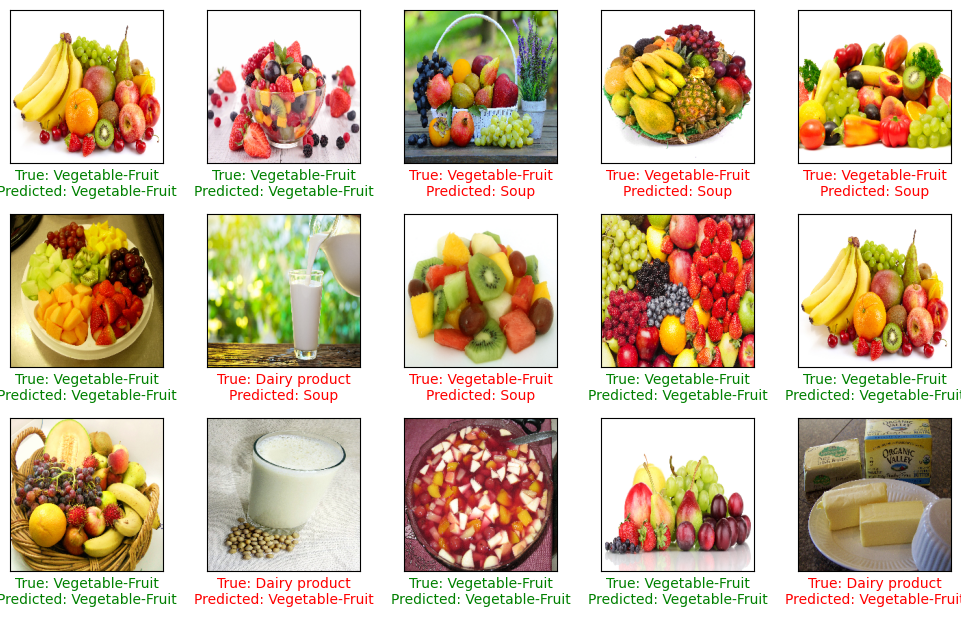

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_set)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test dataset
prediction = model.predict(test_set)

# Get class labels
class_label= list(test_set.class_indices.keys())

# Collect images and labels from the generator
images = []
true_labels = []
predicted_labels = []

for i, (image_batch, label_batch) in enumerate(test_set):
    if i * test_set.batch_size >= 15:
        break
    images.extend(image_batch)
    true_labels.extend(label_batch)
    predicted_labels.extend(predictions[i * test_set.batch_size: (i + 1) * test_set.batch_size])

# Visualize model predictions and explore misclassified images
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    true_label = class_label[np.argmax(true_labels[i])]
    predicted_label = class_labels[np.argmax(predicted_labels[i])]
    color = 'green' if true_label == predicted_label else 'red'
    plt.xlabel(f"True: {true_label}\nPredicted: {predicted_label}", color=color)

plt.tight_layout()
plt.show()

# New Section